In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import stats,wasserstein_distance,rayleigh, kstest

In [35]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:

df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/IA376N/ATIVIDADES/A1/data1.csv',header=None)
df2 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/IA376N/ATIVIDADES/A1/data2.csv',header=None)
df3 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/IA376N/ATIVIDADES/A1/data3.csv',header=None)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-29f2015d7e59>", line 1, in <cell line: 1>
    df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/IA376N/ATIVIDADES/A1/data1.csv',header=None)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 948, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 611, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1448, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1705, in _make_engine
    self.handles = get_handle(
  File "/usr/local/lib/python3.10/dist-pa

In [ ]:
print(df1.head())

NameError: name 'df1' is not defined

In [ ]:
print(df2.head())

                     0   1         2  3                     4       5
0  2019-04-07 13:36:00  38  22536285  M      PLAQUETAS SANGUE  282,00
1  2019-04-07 13:36:00  38  22536285  M  NEUTRÓFILOS ABSOLUTO  5,8476
2  2019-04-07 13:36:00  38  22536285  M   LINFÓCITOS ABSOLUTO  3,1896
3  2019-04-07 13:36:00  38  22536285  M         NEUTRÓFILOS %    44,0
4  2019-04-07 13:36:00  38  22536285  M          LINFÓCITOS %    24,0


In [ ]:
print(df3.head())

                     0   1         2  3                     4       5
0  2021-07-24 00:18:00  73  25834403  M      PLAQUETAS SANGUE  403,00
1  2021-07-24 00:18:00  73  25834403  M  NEUTRÓFILOS ABSOLUTO  2,9153
2  2021-07-24 00:18:00  73  25834403  M   LINFÓCITOS ABSOLUTO  1,8109
3  2021-07-24 00:18:00  73  25834403  M         NEUTRÓFILOS %    29,3
4  2021-07-24 00:18:00  73  25834403  M          LINFÓCITOS %    18,2


In [ ]:
#Concatena os três data_frames

df= pd.concat([df1, df2, df3], axis=0)
print(df)

                          0   1         2  3                     4       5
0       2021-10-24 00:33:00  19  20850235  F      PLAQUETAS SANGUE  316,00
1       2021-10-24 00:33:00  70  16084789  M      PLAQUETAS SANGUE  239,00
2       2021-10-24 00:33:00  62  25926519  F      PLAQUETAS SANGUE  166,00
3       2021-10-24 00:33:00  49  20209887  M      PLAQUETAS SANGUE  201,00
4       2021-10-24 00:33:00  50  25722538  M      PLAQUETAS SANGUE  319,00
...                     ...  ..       ... ..                   ...     ...
134478  2021-12-03 09:31:00  25  24766171  M      PLAQUETAS SANGUE   58,00
134479  2021-12-03 09:31:00  25  24766171  M  NEUTRÓFILOS ABSOLUTO  1,2600
134480  2021-12-03 09:31:00  25  24766171  M   LINFÓCITOS ABSOLUTO  1,3104
134481  2021-12-03 09:31:00  25  24766171  M         NEUTRÓFILOS %    45,0
134482  2021-12-03 09:31:00  25  24766171  M          LINFÓCITOS %    46,8

[356851 rows x 6 columns]


In [ ]:
#Ronomeia as colunas e ajusta os dados

df.columns = ['timestamp', 'age', 'id', 'gender', 'parameter', 'value']
df['value'] = df['value'].str.strip()  # Remover espaços
df = df[df['value'] != '']  # Remover valores vazios
df['value'] = df['value'].str.replace(',', '.').astype(float)

In [ ]:
print(df)

                  timestamp  age        id gender             parameter  \
0       2021-10-24 00:33:00   19  20850235      F      PLAQUETAS SANGUE   
1       2021-10-24 00:33:00   70  16084789      M      PLAQUETAS SANGUE   
2       2021-10-24 00:33:00   62  25926519      F      PLAQUETAS SANGUE   
3       2021-10-24 00:33:00   49  20209887      M      PLAQUETAS SANGUE   
4       2021-10-24 00:33:00   50  25722538      M      PLAQUETAS SANGUE   
...                     ...  ...       ...    ...                   ...   
134478  2021-12-03 09:31:00   25  24766171      M      PLAQUETAS SANGUE   
134479  2021-12-03 09:31:00   25  24766171      M  NEUTRÓFILOS ABSOLUTO   
134480  2021-12-03 09:31:00   25  24766171      M   LINFÓCITOS ABSOLUTO   
134481  2021-12-03 09:31:00   25  24766171      M         NEUTRÓFILOS %   
134482  2021-12-03 09:31:00   25  24766171      M          LINFÓCITOS %   

           value  
0       316.0000  
1       239.0000  
2       166.0000  
3       201.0000  
4   

In [ ]:
plaquetas_df = df[df['parameter'] == 'PLAQUETAS SANGUE']

In [ ]:
print(plaquetas_df)

                  timestamp  age        id gender         parameter  value
0       2021-10-24 00:33:00   19  20850235      F  PLAQUETAS SANGUE  316.0
1       2021-10-24 00:33:00   70  16084789      M  PLAQUETAS SANGUE  239.0
2       2021-10-24 00:33:00   62  25926519      F  PLAQUETAS SANGUE  166.0
3       2021-10-24 00:33:00   49  20209887      M  PLAQUETAS SANGUE  201.0
4       2021-10-24 00:33:00   50  25722538      M  PLAQUETAS SANGUE  319.0
...                     ...  ...       ...    ...               ...    ...
134458  2021-10-23 22:14:00   74  24902634      M  PLAQUETAS SANGUE  595.0
134459  2021-10-23 22:14:00   51  25881631      M  PLAQUETAS SANGUE  115.0
134460  2021-10-23 22:14:00   18  25932729      M  PLAQUETAS SANGUE  307.0
134473  2021-10-23 22:21:00   95  25932815      M  PLAQUETAS SANGUE  316.0
134478  2021-12-03 09:31:00   25  24766171      M  PLAQUETAS SANGUE   58.0

[64064 rows x 6 columns]


In [ ]:
# Verificar se existem valores não finitos no DataFrame
non_finite_values = plaquetas_df['value'][~np.isfinite(plaquetas_df['value'])]
print(f"Valores não finitos encontrados:\n{non_finite_values}")

#Remover esses valores do DataFrame
plaquetas_df = plaquetas_df[np.isfinite(plaquetas_df['value'])]

Valores não finitos encontrados:
Series([], Name: value, dtype: float64)


In [ ]:
df_train, df_temp = train_test_split(plaquetas_df, test_size=0.3, random_state=42)

In [ ]:
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

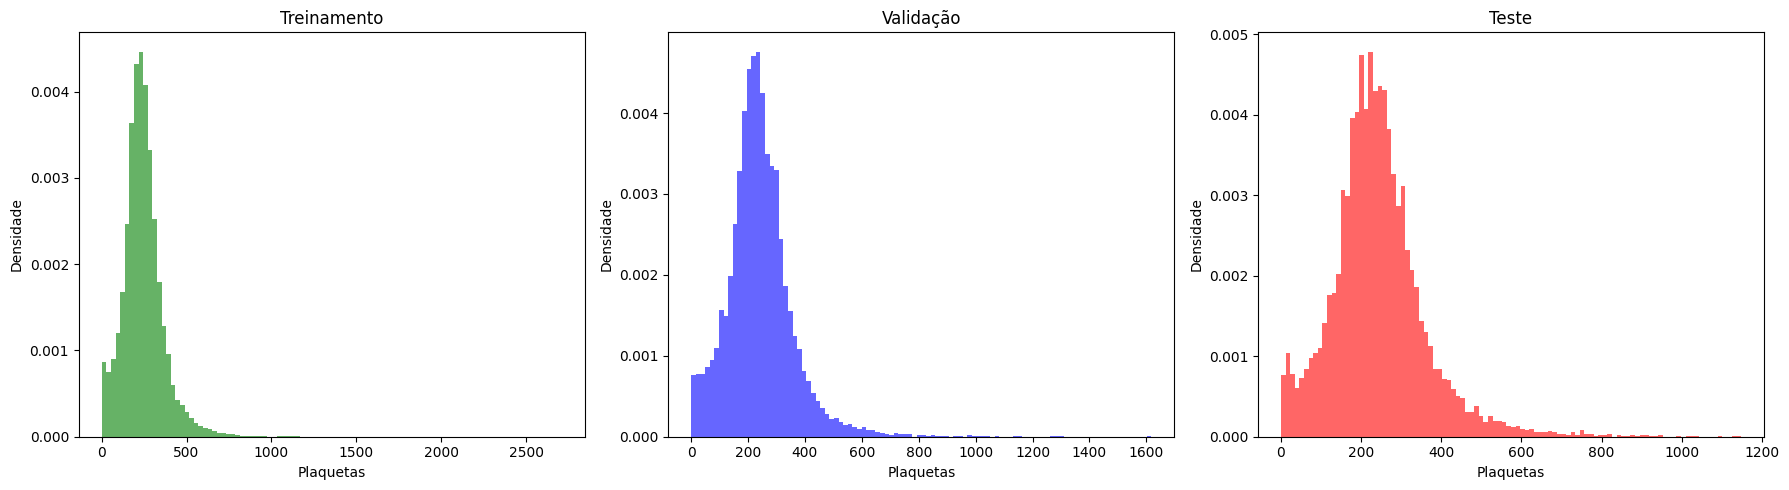

In [ ]:
#plt.hist(df_train['value'], bins=1000, density=True, alpha=0.6, color='g')
#plt.show()


plt.figure(figsize=(18, 5))

# Histograma do conjunto de treinamento
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, 1ª posição
plt.hist(df_train['value'], bins=100, density=True, alpha=0.6, color='g')
plt.title('Treinamento')
plt.xlabel('Plaquetas')
plt.ylabel('Densidade')

# Histograma do conjunto de validação
plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, 2ª posição
plt.hist(df_val['value'], bins=100, density=True, alpha=0.6, color='b')
plt.title('Validação')
plt.xlabel('Plaquetas')
plt.ylabel('Densidade')

# Histograma do conjunto de teste
plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, 3ª posição
plt.hist(df_test['value'], bins=100, density=True, alpha=0.6, color='r')
plt.title('Teste')
plt.xlabel('Plaquetas')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()


In [ ]:


plaquetas_df = plaquetas_df.reset_index(drop=True)

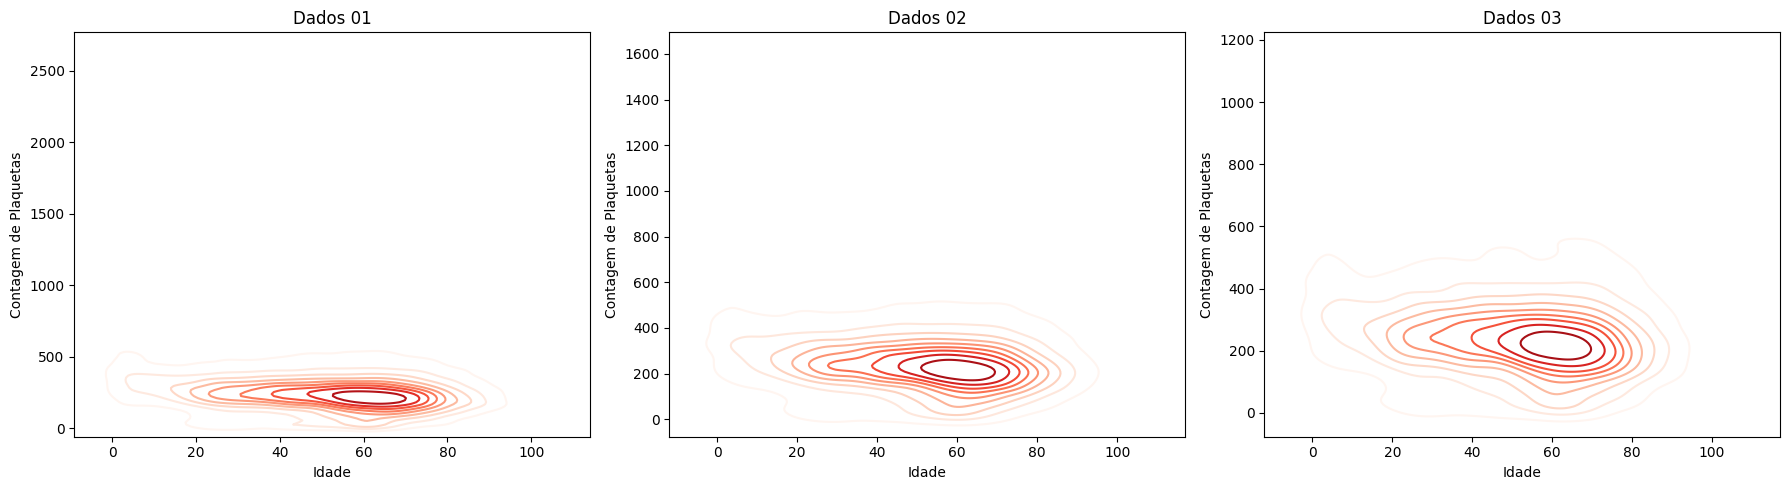

In [ ]:
#Kernel Density Estimation
#KDE condicional à idade
#sns.kdeplot(x=df_train['age'], y=df_train['value'], cmap="Reds")
#plt.xlabel('Idade')
#plt.ylabel('Contagem de Plaquetas')
#plt.show()



plt.figure(figsize=(18, 5))

# Histograma do conjunto de treinamento
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, 1ª posição
sns.kdeplot(x=df_train['age'], y=df_train['value'], cmap="Reds")
plt.title('Dados 01')
plt.xlabel('Idade')
plt.ylabel('Contagem de Plaquetas')

# Histograma do conjunto de validação
plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, 2ª posição
sns.kdeplot(x=df_val['age'], y=df_val['value'], cmap="Reds")
plt.title('Dados 02')
plt.xlabel('Idade')
plt.ylabel('Contagem de Plaquetas')

# Histograma do conjunto de teste
plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, 3ª posição
sns.kdeplot(x=df_test['age'], y=df_test['value'], cmap="Reds")
plt.title('Dados 03')
plt.xlabel('Idade')
plt.ylabel('Contagem de Plaquetas')

plt.tight_layout()
plt.show()

In [ ]:
#Distribuições: ['norm', 'lognorm', 'expon', 'gamma', 'beta', 'weibull_min','rayleight']

distributions = ['norm', 'lognorm', 'expon', 'gamma', 'beta', 'weibull_min','rayleigh']

for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(plaquetas_df['value'])
    print(f"{dist_name}: {params}")


norm: (243.8209903061145, 120.87962577983869)
lognorm: (0.2239716537252649, -269.74653634776604, 500.67895867127646)
expon: (1.0, 242.8209903061145)
gamma: (10.359000750939948, -131.447177819193, 36.22629078195898)
beta: (9.384379864305936, 6393029.859200226, -116.55146275067519, 245652972.12107342)
weibull_min: (2.1261490501679443, -7.466007018319518, 282.4569740132862)
rayleigh: (-2.992778883219723, 194.3308012000668)


In [ ]:
from scipy.stats import kstest

# Ajustar diferentes distribuições e calcular o KS Test
results = {}
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(plaquetas_df['value'])
    D, p_value = kstest(plaquetas_df['value'], dist_name, args=params)
    results[dist_name] = {'D': D, 'p_value': p_value}

# Exibir os resultados
print(results)


{'norm': {'D': 0.07779547288180022, 'p_value': 0.0}, 'lognorm': {'D': 0.05004526726045841, 'p_value': 7.090227055824583e-140}, 'expon': {'D': 0.2853542528929326, 'p_value': 0.0}, 'gamma': {'D': 0.05151806758651903, 'p_value': 3.292524128440253e-148}, 'beta': {'D': 0.05407882256351501, 'p_value': 2.8309455418105586e-163}, 'weibull_min': {'D': 0.0799879447898566, 'p_value': 0.0}, 'rayleigh': {'D': 0.09620866168959846, 'p_value': 0.0}}


In [ ]:
# Definir os parâmetros da distribuição normal subjacente
m=df_train['value'].mean()
sigma=df_train['value'].std()
# Número de amostras
num_samples = 1000

# Gerar dados sintéticos
#synthetic_data = np.random.normal(mean=m, sigma=sigma, size=num_samples)

dados_sinteticos_normal = pd.DataFrame({
    'PLAQUETAS_SINT':np.random.normal(loc=m,scale=sigma, size=num_samples),

})
# Exibir os primeiros 5 valores
#print(dados_sinteticos_normal)


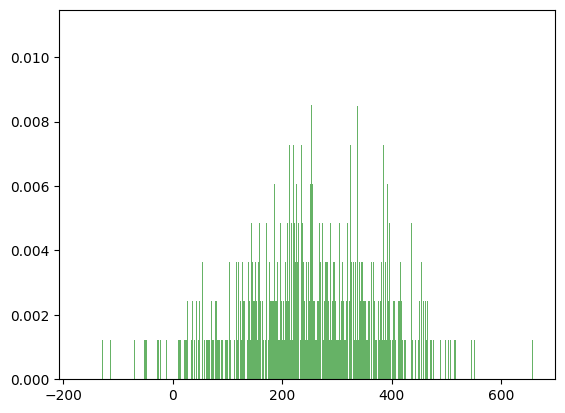

In [ ]:
plt.hist(dados_sinteticos_normal['PLAQUETAS_SINT'], bins=1000, density=True, alpha=0.6, color='g')
plt.show()

In [ ]:
#Distribuição Lognormal

log_real_data = np.log(df_train['value'])

mu, sigma = np.mean(log_real_data), np.std(log_real_data)

dados_sinteticos_lognormal = pd.DataFrame({
    'PLAQUETAS_SINT':np.random.lognormal(mean=mu, sigma=sigma, size=num_samples),

})

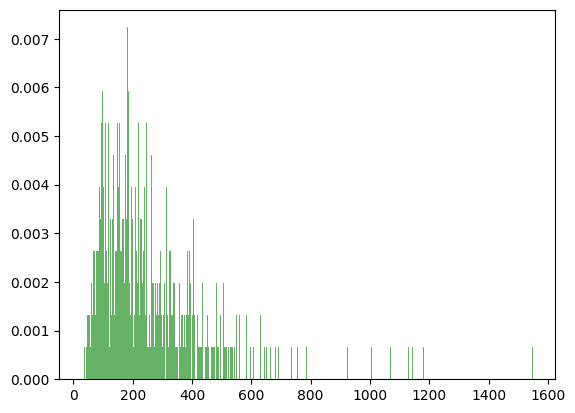

In [ ]:
plt.hist(dados_sinteticos_lognormal['PLAQUETAS_SINT'], bins=1000, density=True, alpha=0.6, color='g')
plt.show()

In [ ]:
#Distribuição de Rayleigh

# Calcular a média dos quadrados dos dados de treinamento
mean_square = np.mean(np.array(df_train['value'])**2)

# Estimar o parâmetro de escala
sigma = np.sqrt(mean_square / 2)

# Gerar dados sintéticos
num_samples = 1000
synthetic_data_ray = np.random.rayleigh(scale=sigma, size=num_samples)

dados_sinteticos_ray = pd.DataFrame({
    'PLAQUETAS_SINT':np.random.rayleigh(scale=sigma, size=num_samples),

})



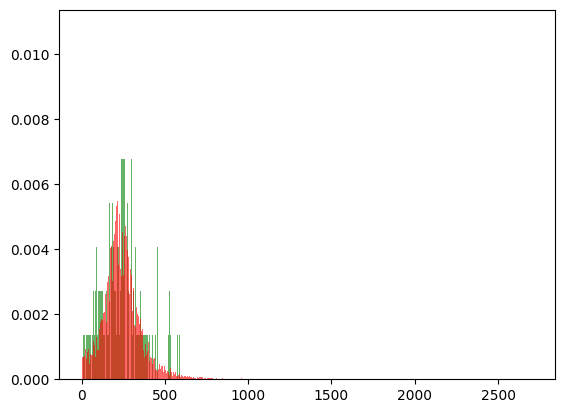

In [ ]:
plt.hist(dados_sinteticos_ray['PLAQUETAS_SINT'], bins=1000, density=True, alpha=0.6, color='g')
plt.hist(df_train['value'], bins=1000, density=True, alpha=0.6, color='r')
plt.show()

In [ ]:
#Distribuição de Poison

# Definir o parâmetro λ com base na média dos dados reais
lam = df_train['value'].mean()

num_samples = 1000
synthetic_data_poison = np.random.poisson(lam, size=num_samples)
dados_sinteticos_poison = pd.DataFrame({
    'PLAQUETAS_SINT':np.random.poisson(lam, size=num_samples),

})




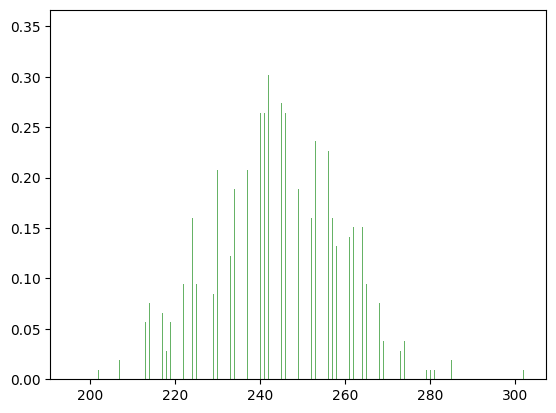

In [ ]:
plt.hist(dados_sinteticos_poison['PLAQUETAS_SINT'], bins=1000, density=True, alpha=0.6, color='g')
plt.show()

In [ ]:
from scipy.stats import wasserstein_distance

#Distância de Wasserstein
distanceref= wasserstein_distance(df_val['value'], df_test['value'])
print(f"Distância de Wasserstein de Referência: {distanceref}")

distancenormal = wasserstein_distance(df_test['value'], dados_sinteticos_normal['PLAQUETAS_SINT'])
print(f"Distância de Wasserstein Normal: {distancenormal}")

distancelogn = wasserstein_distance(df_test['value'], dados_sinteticos_lognormal['PLAQUETAS_SINT'])
print(f"Distância de Wasserstein LogNormal: {distancelogn}")

distanceray = wasserstein_distance(df_test['value'], dados_sinteticos_ray['PLAQUETAS_SINT'])
print(f"Distância de Wasserstein Rayleigh: {distanceray}")

distancepoison = wasserstein_distance(df_test['value'], dados_sinteticos_poison['PLAQUETAS_SINT'])
print(f"Distância de Wasserstein Posison: {distancepoison}")

# Calcular o RMSE
#rmseref = mean_squared_error(df_val['value'], df_test['value'], squared=False)

#print(f'RMSE de Referência: {rmseref}')

Distância de Wasserstein de Referência: 2.6466507569808964
Distância de Wasserstein Normal: 21.637943999760246
Distância de Wasserstein LogNormal: 43.884472206384245
Distância de Wasserstein Rayleigh: 18.026033673895718
Distância de Wasserstein Posison: 73.11102705515088
